In [16]:
import numpy as np
import matplotlib.pyplot as plt
import copy

n = 5
N = 26
def c(i, j):
    return 0.1*N*(i+1)*(j+1)
def Gauss(A, b):
    C = copy.copy(A)
    k = copy.copy(b)
    size = C.shape[0]
    x = np.zeros(size)
    for j in range(size):
        for i in range(j+1,size):
            t = C[i, j]/C[j, j]
            C[i] -= C[j]*t
            k[i] -= k[j]*t
    x[size-1]=k[size-1]/C[size-1,size-1]
    for j in range (size-2,-1,-1):
        l=0
        for i in range (size-1-j):
            l+=(x[size-1-i]*C[j,size-1-i])
        x[j]=(k[j]-l)/C[j, j]
    return x

In [17]:
A = np.array([[31/(((c(i,j)**2)+6*c(i,j))**1/2) for j in range(n)] for i in range(n)])
A

array([[2.77280859, 1.06456044, 0.57599405, 0.36350844, 0.25101215],
       [1.06456044, 0.36350844, 0.1839981 , 0.11122273, 0.07451923],
       [0.57599405, 0.1839981 , 0.09012152, 0.0534188 , 0.03532764],
       [0.36350844, 0.11122273, 0.0534188 , 0.0313106 , 0.02055703],
       [0.25101215, 0.07451923, 0.03532764, 0.02055703, 0.01343445]])

In [19]:
b = np.array([float(N) for i in range(n)])
b.reshape(5, 1)

array([[26.],
       [26.],
       [26.],
       [26.],
       [26.]])

In [20]:
x1 = Gauss(A, b)
x1.reshape(5,1)

array([[    31293.67379628],
       [ -1094368.12616523],
       [  7220071.40464891],
       [-14956609.05194189],
       [  9387637.81451515]])

In [21]:
x2 = np.linalg.solve(A, b)
x2.reshape(5, 1)

array([[    31293.67379798],
       [ -1094368.12623269],
       [  7220071.40511768],
       [-14956609.05294055],
       [  9387637.81515302]])

In [22]:
np.linalg.cond(A)

73809963.97123413

In [23]:
eps = 0.001
d = np.zeros(n)
x = copy.copy(x1)
for i in range (n):
    B = copy.copy(b);
    B[i] += eps
    xi = np.linalg.solve(A, B)
    d[i] = max(x-xi)/max(x)
d.reshape(5, 1)

array([[2.38863323e-06],
       [6.27504476e-05],
       [6.71345717e-04],
       [9.18597758e-04],
       [9.18597932e-04]])

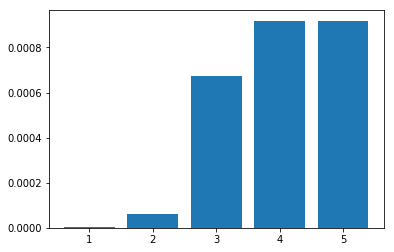

0.0009185979318620726  - максимальная погрешность у 5  - ой компоненты вектора


In [24]:
xhist = np.arange(1, n+1)
yhist = copy.copy(d)

plt.bar(xhist, yhist)
plt.show()

print(max(d), ' - максимальная погрешность у', np.where(d==max(d))[0][0]+1, ' - ой компоненты вектора')

In [25]:
for i in range(n):
    print (d[i]<=np.linalg.cond(A)*eps)

True
True
True
True
True


In [27]:
np.linalg.cond(A)*eps

73809.96397123413